In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
train_df = pd.read_csv('train_hr.csv', header=0)
train_df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [3]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

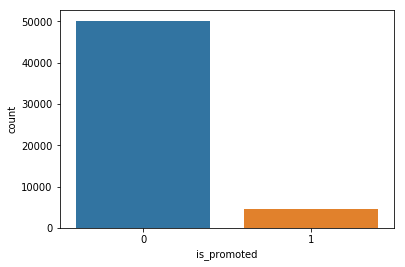

In [5]:
sns.countplot(train_df['is_promoted'])

KeyError: "None of [Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n            ...\n            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n           dtype='int64', length=54808)] are in the [columns]"

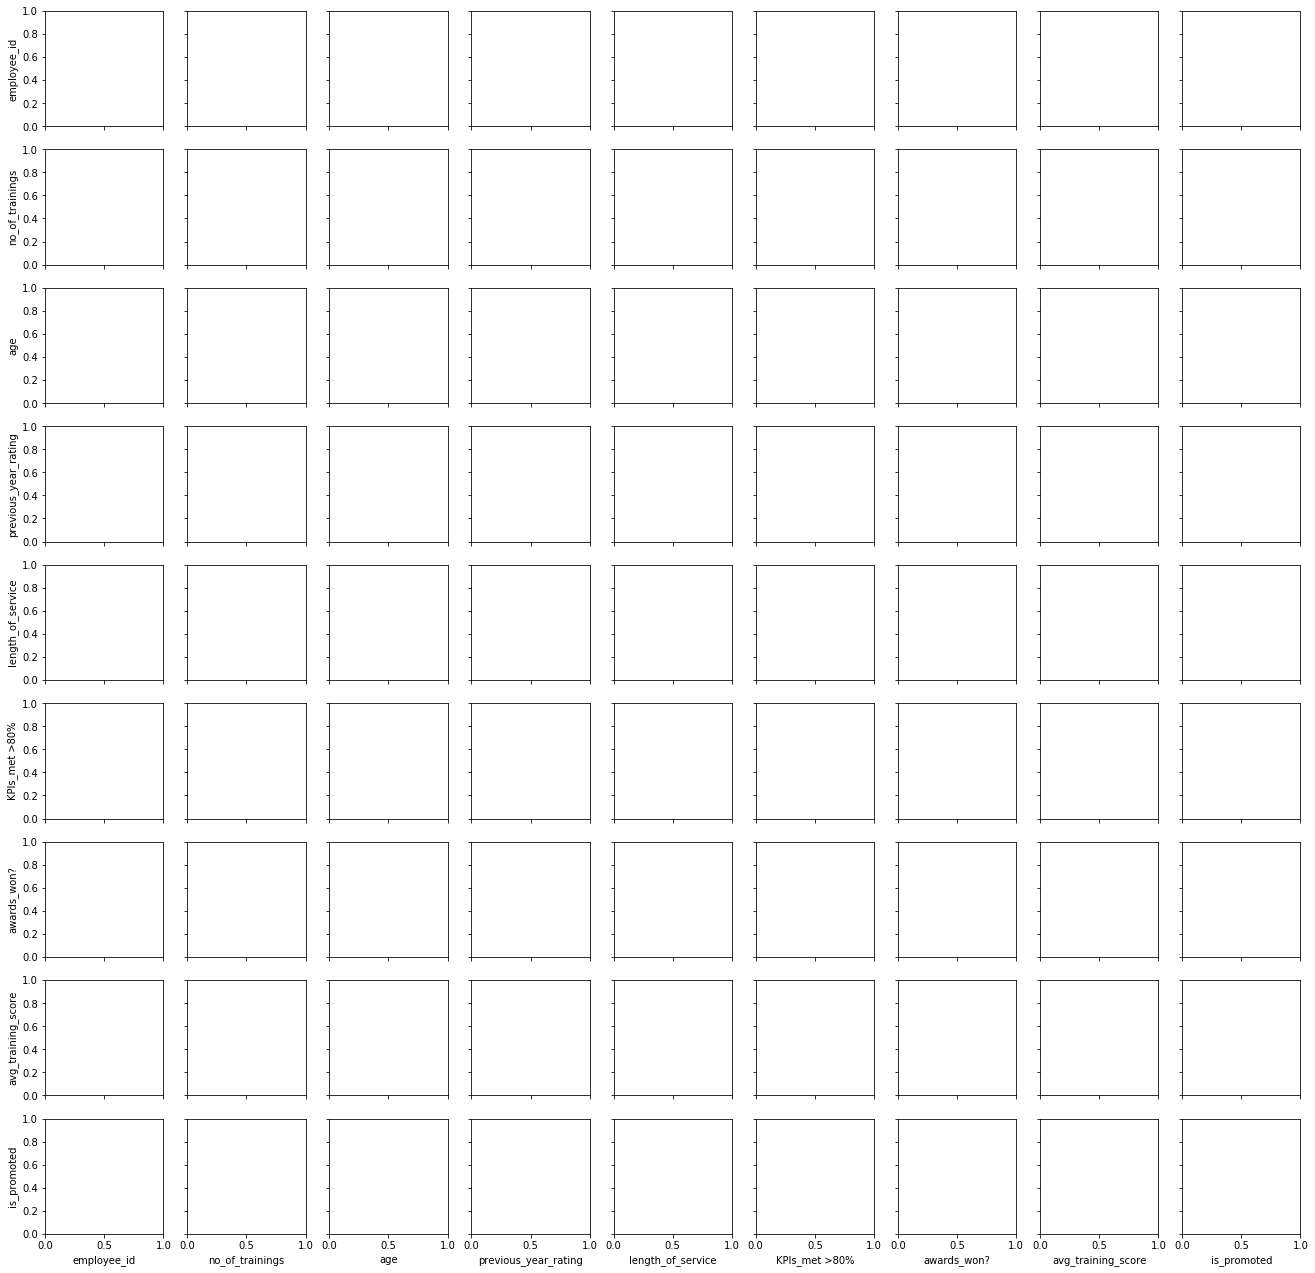

In [7]:
sns.pairplot(train_df,hue=train_df['is_promoted'])

In [4]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
train_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
train_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [7]:
for value in ["education","previous_year_rating"]:
    train_df[value].fillna(train_df[value].mode()[0],inplace=True)

In [8]:
colname=[]
for x in train_df.columns:
    if train_df[x].dtype=='object':
        colname.append(x)
colname

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [11]:
train_df.dtypes

employee_id               int64
department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [10]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    train_df[x]=le.fit_transform(train_df[x])

In [20]:
X=train_df.values[:,:-1]
Y=train_df.values[:,-1]

X.shape

(54808, 13)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X=scaler.transform(X)

print(X)

[[ 1.16185837  0.80893285  1.77652645 ...  1.35687789 -0.15401776
  -1.07593145]
 [ 1.14870885 -0.38818322 -0.16303375 ... -0.73698599 -0.15401776
  -0.25328242]
 [-1.40274081  0.80893285 -0.61940086 ... -0.73698599 -0.15401776
  -1.00114517]
 ...
 [-1.11916278 -1.98433798 -1.76031862 ...  1.35687789 -0.15401776
   1.1676568 ]
 [-1.13262222  0.80893285  2.00471    ... -0.73698599 -0.15401776
  -1.37507655]
 [ 0.54591182 -1.1862606  -0.16303375 ... -0.73698599 -0.15401776
  -1.07593145]]


In [27]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [28]:
from sklearn.linear_model import LogisticRegression

#create model
classifier = LogisticRegression()

#fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred=classifier.predict(X_test)

print(classifier.coef_)
print(classifier.intercept_)

[[-0.0109554   0.1947649   0.04309802  0.11953499  0.00733254  0.01030041
  -0.09711067 -0.16804429  0.40659002  0.10141402  0.61689991  0.29757709
   0.63185556]]
[-2.90003571]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test, Y_pred)
print(cfm)

print('Classification report: ')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

[[14994    70]
 [ 1276   103]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15064
         1.0       0.60      0.07      0.13      1379

   micro avg       0.92      0.92      0.92     16443
   macro avg       0.76      0.54      0.54     16443
weighted avg       0.89      0.92      0.89     16443

Accuracy of the model:  0.9181414583713434


In [30]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.98726033 0.01273967]
 [0.99264651 0.00735349]
 [0.96668769 0.03331231]
 ...
 [0.98924084 0.01075916]
 [0.91215713 0.08784287]
 [0.95757867 0.04242133]]


In [38]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.67:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test, y_pred_class)
print(cfm)

print('Classification report: ')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ", acc)

[[15042    22]
 [ 1322    57]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15064
         1.0       0.72      0.04      0.08      1379

   micro avg       0.92      0.92      0.92     16443
   macro avg       0.82      0.52      0.52     16443
weighted avg       0.90      0.92      0.88     16443

Accuracy of the model:  0.9182630906768838


In [43]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = train_df[train_df.is_promoted==0]
df_minority = train_df[train_df.is_promoted==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True, # sample with replacement
n_samples=50140, # to match majority class
random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.is_promoted.value_counts()

1    50140
0    50140
Name: is_promoted, dtype: int64

In [44]:
X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]

X.shape

(100280, 13)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X=scaler.transform(X)

print(X)

[[ 1.15981971  0.80095407  1.76473212 ...  0.98195379 -0.2672541
  -1.23779348]
 [ 1.14669805 -0.38713063 -0.1773577  ... -1.01837786 -0.2672541
  -0.48025744]
 [-1.39934691  0.80095407 -0.63432001 ... -1.01837786 -0.2672541
  -1.16892656]
 ...
 [ 1.43745119  1.19698231 -0.06311712 ...  0.98195379 -0.2672541
   0.75934699]
 [-0.09274711  0.40492584  0.39384519 ...  0.98195379 -0.2672541
   1.31028229]
 [ 0.92729673 -1.97124358 -0.1773577  ... -1.01837786 -0.2672541
   1.3791492 ]]


In [46]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [47]:
from sklearn.linear_model import LogisticRegression

#create model
classifier = LogisticRegression()

#fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred=classifier.predict(X_test)

print(classifier.coef_)
print(classifier.intercept_)

[[-0.01481975  0.22379993  0.01490543  0.0910182   0.01625551 -0.00313076
  -0.11259322 -0.17371898  0.43842971  0.09611285  0.80585861  0.51383587
   0.72290476]]
[0.02849536]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test, Y_pred)
print(cfm)

print('Classification report: ')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

[[10810  4205]
 [ 4234 10835]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72     15015
         1.0       0.72      0.72      0.72     15069

   micro avg       0.72      0.72      0.72     30084
   macro avg       0.72      0.72      0.72     30084
weighted avg       0.72      0.72      0.72     30084

Accuracy of the model:  0.7194854407658556


In [49]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.69413953 0.30586047]
 [0.89419444 0.10580556]
 [0.36856084 0.63143916]
 ...
 [0.93056712 0.06943288]
 [0.08965686 0.91034314]
 [0.92468546 0.07531454]]


In [50]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.67:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 